# Visualize the impact of Input Dropout on the conditional mean observed with a static dataset.
Shows that Input Dropout changes the observed $\mathbb{E}[Y|X]$.
Reproduces Figure 1 from the paper.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns

In [2]:
dim = 4
x = np.array([np.linspace(-2, 2, 1000000) for i in range(dim)]).T#np.random.uniform(-1, 1, size=(100000, 3))
order_1 = lambda x: x
order_2 = lambda x1, x2: x1*x2
order_3 = lambda x1, x2, x3: x1*x2*x3
order_4 = lambda x1, x2, x3, x4: x1*x2*x3*x4

drop = lambda x, rate: x*np.random.binomial(1, 1-rate, size=x.shape)

In [3]:
def bin_and_mean(x, y):
    # Bin x and calc mean of y within each bin.
    bins = np.linspace(-1, 1, 20)
    indxs = np.digitize(x, bins)
    means = np.array([np.mean(y[indxs == i]) for i in set(indxs)])
    bin_width = bins[1] - bins[0]
    bin_mids = bins - (bin_width / 2)
    bin_mids = np.hstack((bin_mids, bin_mids[-1] + bin_width))
    return bin_mids, means

def plot_single(x, y, label, xmin=-1.05, xmax=1.05):
    idxs = np.logical_and(x > xmin, x< xmax)
    bin_mids, means = bin_and_mean(x[idxs], y[idxs])
    plt.plot(bin_mids, means, label=label)
    
def plot_drop(x, y, rate):
    return plot_single(x, y, 'Dropout={:.2f}'.format(rate))
    
def plot_no_drop(x, y):
    return plot_single(x, y, 'No Dropout')
    
def plot(order):
    x0 = x[:, 0]
    x1 = x[:, 1]
    x2 = x[:, 2]
    x3 = x[:, 3]
    fig = plt.figure(figsize=(8,8))
    if order == 1:
        plot_no_drop(x0, order_1(x0))
        plot_drop(x0, order_1(drop(x0, 0.1)), 0.1)
        plot_drop(x0, order_1(drop(x0, 0.25)), 0.25)
        plot_drop(x0, order_1(drop(x0, 0.5)), 0.5)
    elif order == 2:
        plot_no_drop(x0, order_2(x0, x1))
        plot_drop(x0, order_2(drop(x0, 0.1), drop(x1, 0.1)), 0.1)
        plot_drop(x0, order_2(drop(x0, 0.25), drop(x1, 0.25)), 0.25)
        plot_drop(x0, order_2(drop(x0, 0.5), drop(x1, 0.5)), 0.5)
    elif order == 3:
        plot_no_drop(x0, order_3(x0, x1, x2))
        plot_drop(x0, order_3(drop(x0, 0.1), drop(x1, 0.1), drop(x2, 0.1)), 0.1)
        plot_drop(x0, order_3(drop(x0, 0.25), drop(x1, 0.25), drop(x2, 0.25)), 0.25)
        plot_drop(x0, order_3(drop(x0, 0.5), drop(x1, 0.5), drop(x2, 0.5)), 0.5)
    elif order == 4:
        plot_no_drop(x0, order_4(x0, x1, x2, x3))
        plot_drop(x0, order_4(drop(x0, 0.1), drop(x1, 0.1), drop(x2, 0.1), drop(x3, 0.1)), 0.1)
        plot_drop(x0, order_4(drop(x0, 0.25), drop(x1, 0.25), drop(x2, 0.25), drop(x3, 0.25)), 0.25)
        plot_drop(x0, order_4(drop(x0, 0.5), drop(x1, 0.5), drop(x2, 0.5), drop(x3, 0.5)), 0.5)
    
    plt.xlim([0, 1.01])
    plt.ylim([0, 1])
    plt.xlabel("X", fontsize=28)
    plt.ylabel("$\mathbb{E}[Y | X]$", fontsize=28)#, rotation=0)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.savefig("results/input_dropout_effects_{}.pdf".format(order), bbox_inches='tight', dpi=300)

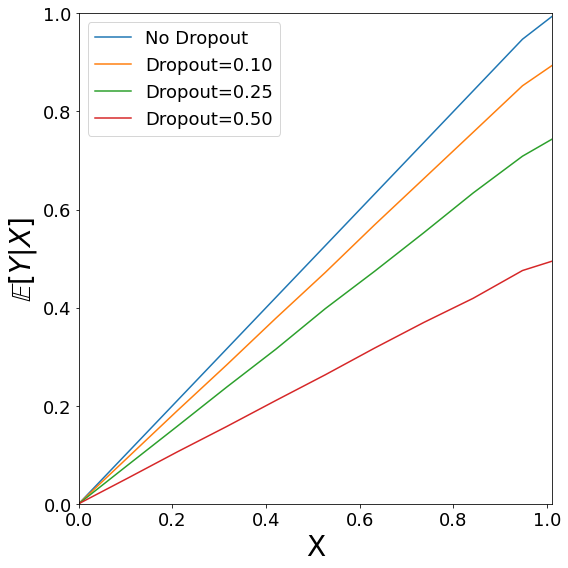

In [4]:
plot(1)

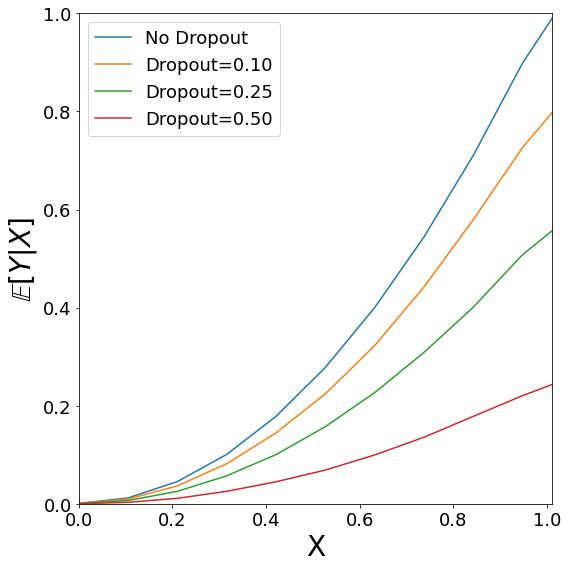

In [5]:
plot(2)

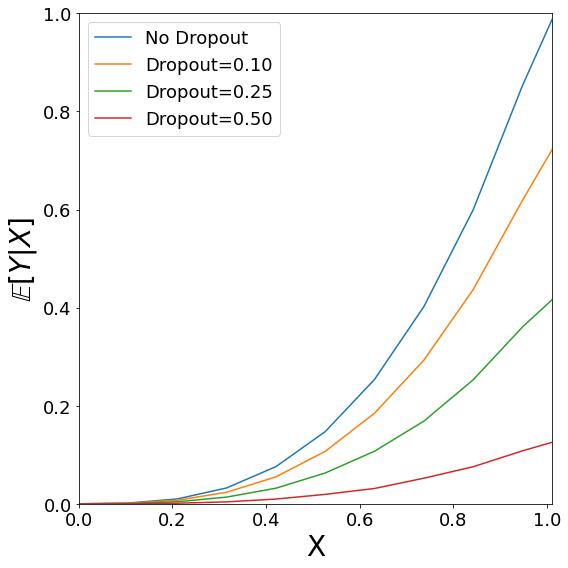

In [6]:
plot(3)

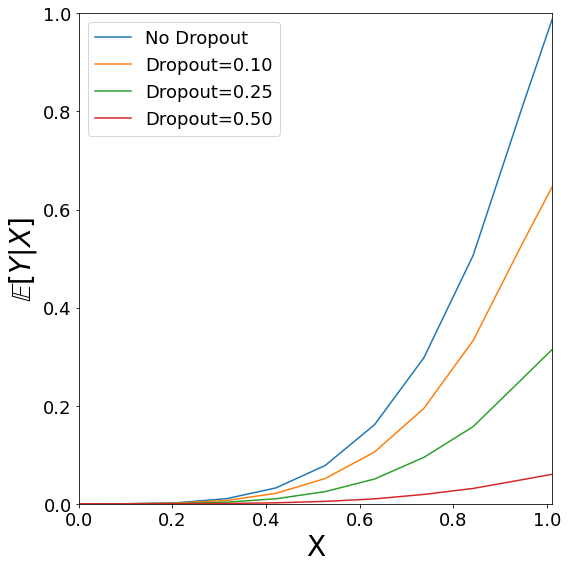

In [7]:
plot(4)